In [1]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/dot'

import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
# https://colab.research.google.com/drive/1qD1GRCTZrPh_FaGkX05B3mqyC7QzrWpM

In [7]:
df_dict = {'name': ['Tom',  'Herman',  'Richard',  'Sam',  'Anne',  'Max',  'Alex',  'Philip',  'Frans',  
                           'Peter',  'Bill',  'Susan',  'Maria',  'Robert',  'Alfred',  'Paul',  'Claire',  'George',  
                           'Bernard',  'Eric',  'Anita',  'Joe',  'Charles',  'David']
, 'woman': [0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0]
, 'bald head': [1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]
, 'glasses': [1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0]
, 'big nose': [0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0]
, 'hat or cap': [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0]
, 'beard': [0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1]
, 'moustache': [0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0]
, 'chin-beard': [0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]
, 'hair color white': [0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0]
, 'hair color blond': [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1]
, 'hair color red': [0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0]
, 'hair color brown': [0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0]
, 'hair color black': [1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]
, 'eye color blue': [1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0]
}

df = pd.DataFrame(df_dict)
name_encoder = LabelEncoder()
df.name = name_encoder.fit_transform(df.name)

In [10]:
df.sum(axis = 0)

name                276
woman                 5
bald head             5
glasses               5
big nose              5
hat or cap            5
beard                 8
moustache             5
chin-beard            4
hair color white      5
hair color blond      5
hair color red        5
hair color brown      4
hair color black      5
eye color blue        5
dtype: int64

In [4]:
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
decision_tree_classifier.fit(df.drop("name", inplace=False, axis = 1), df["name"])

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [5]:
feature_names = df.drop("name", axis = 1, inplace = False).columns
target_names = np.array(df["name"].values, dtype = np.str_)
dot_data = export_graphviz(decision_tree_classifier, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=target_names)
graph = graphviz.Source(dot_data)

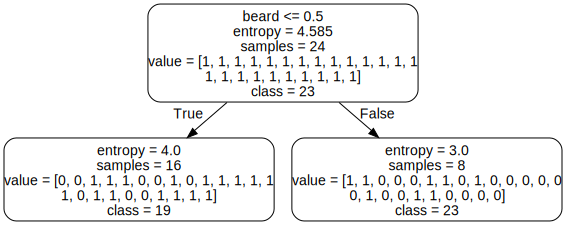

In [6]:
graph

In [8]:
decision_tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [9]:
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy")
decision_tree_classifier.fit(df.drop("name", inplace=False, axis = 1), df["name"])

DecisionTreeClassifier(criterion='entropy')

In [10]:
import ast
from sklearn.tree import _tree
PYTHON_INDENT_STEP = "    "

def pythonize(feature_name):
    """
    Since we will be likely using the columns names of some datasets, and will wish to 
    have some python parmeters for referencing them we need to make sure that these 
    names abide by the python varible nameing convention.

    This function is a really quick and dirty way of achieveing this, in through some quick replace rules.
    """
    return (
        feature_name
            .replace(" ", "_")
            .replace("(", "_")
            .replace(")", "_")
            .replace("__", "_")
    )

def get_node_feature_names(tree_, feature_names):
    """
    Whenever possible, return the feature names (as in strings)
    """
    try:
        return [
            pythonize(feature_names[i]) if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in tree_.feature
        ]
    except:
        # when something goes wrong with the above, we will have numbers in the `tree_.feature` list 
        # which we want to convert to actual python variable names (i.e. by converting 5 to "_5")

        # TODO: maybe add this rule to the `pythonize` function and use here instead
        return [f"_{i}" for i in tree_.feature]
    
def stringify_list(_list):
    return f"[{', '.join(str(i) for i in _list)}]"

def probabilities(node_counts):
    """
    By default, the tree stores the number of datapoints from each class in a leaf node (as the node values)
    but we want to convert this into probabilities so the generated code acts like a propper model.

    We can use `softmax` of other squish-list-to-probabilities formulas (in this case `a / sum(A)`)
    """
    return node_counts / np.sum(node_counts)

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_names = list(map(pythonize, feature_names))
    node_feature_name = get_node_feature_names(tree_, feature_names)
    print(f"def tree_model({', '.join(feature_names)}):")

    def __recurse(node, depth):
        indent = PYTHON_INDENT_STEP * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = node_feature_name[node]
            threshold = tree_.threshold[node]
            
            print(f"{indent}if ({name} <= {threshold}):")
            __recurse(tree_.children_left[node], depth + 1)

            print(f"{indent}else:  # if ({name} > {threshold})")
            __recurse(tree_.children_right[node], depth + 1)
        else:
            name = name_encoder.inverse_transform([ast.literal_eval(stringify_list(probabilities(tree_.value[node][0]))).index(1.0)])[0]
#             print(f"{indent}return {stringify_list(probabilities(tree_.value[node][0]))}")
            print(f"{indent}return 'Aha it is {name}!'")

    __recurse(0, 1)

tree_to_code(decision_tree_classifier, feature_names)

def tree_model(woman, bald_head, glasses, big_nose, hat_or_cap, beard, moustache, chin-beard, hair_color_white, hair_color_blond, hair_color_red, hair_color_brown, hair_color_black, eye_color_blue):
    if (beard <= 0.5):
        if (hair_color_white <= 0.5):
            if (hat_or_cap <= 0.5):
                if (eye_color_blue <= 0.5):
                    if (hair_color_red <= 0.5):
                        if (glasses <= 0.5):
                            return 'Aha it is Anne!'
                        else:  # if (glasses > 0.5)
                            return 'Aha it is Joe!'
                    else:  # if (hair_color_red > 0.5)
                        if (bald_head <= 0.5):
                            return 'Aha it is Frans!'
                        else:  # if (bald_head > 0.5)
                            return 'Aha it is Herman!'
                else:  # if (eye_color_blue > 0.5)
                    if (hair_color_brown <= 0.5):
                        if (glasses <= 0.5):